### Lab 1.2: Binary Linear Classifier

In this lab you will try making a binary linear classifier using the [Palmer Penguins dataset](https://allisonhorst.github.io/palmerpenguins/).

You will need to install the packages ``sklearn``, ``palmerpenguins``, and ``mlxtend``.  In the following code block, the ``!`` indicates a shell command.

In [1]:
!pip install scikit-learn palmerpenguins mlxtend


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python3.11 -m pip install --upgrade pip


In [2]:
import sklearn
from palmerpenguins import load_penguins
from mlxtend.plotting import plot_decision_regions
import pandas as pd

The dataset is loaded as a [Pandas dataframe](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html).  

In [3]:
df = load_penguins()
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


For simplicity we will drop any rows with missing values (encoded as NaNs).

In [4]:
df.dropna(inplace=True)
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007


Let's select just the Adelie and Chinstrap penguins.

In [5]:
df = df[(df['species']=='Adelie')|(df['species']=='Chinstrap')]

Now we will grab the flipper length and bill length to be the features (stored in ``X``) and the species as the labels (stored in ``y``).

In [6]:
X = df[['flipper_length_mm','bill_length_mm']].values
y = df['species'].map({'Adelie':0,'Chinstrap':1}).values

## Exercises

1. Fit a binary linear classifier using scikit-learn (see ``sklearn.linear_model.LogisticRegression``).

Plot the resulting classifier using ``plot_decision_regions(X, y, clf=model)``.


In [7]:
model = sklearn.linear_model.LogisticRegression().fit(X,y)

<Axes: >

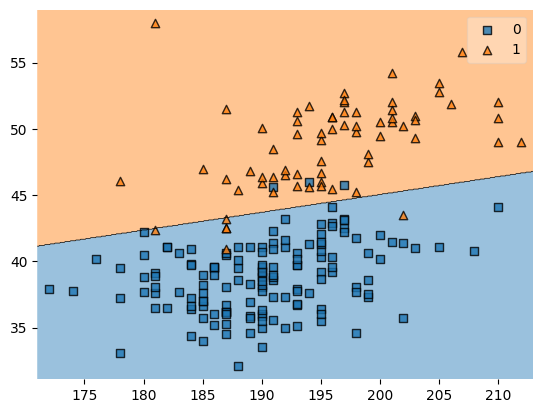

In [8]:
plot_decision_regions(X, y, clf=model)

2. Print out the coefficients of the line (``model.coef_``).  Interpret these values (in terms of the direction of the line and also what they tell us about how the classifier operates).

In [9]:
model.coef_

array([[-0.15845623,  1.17936568]])

The coefficients are -0.1584 for flipper length and 1.1793 for bill length. The negative value for flipper length means that the classifier is more likely to predict Adelie if the flipper length is smaller and the positive value for bill length means that the classifier is more likely to predict Chinstrap if bill length is larger. 

3. Calculate and print out the accuracy of the classifier using the `.score` function.  Interpret this value.

In [10]:
score = model.score(X, y)
score

0.9579439252336449

The score of .9579 means that the classifier is correct 95.79% of the time, or the accuracy of hte model. I thas high accuracy and the features provide good separation between the two species. 

4. Try different combinations of features and print out the accuracy for each one.  Interpret your results.

In [11]:
df = pd.get_dummies(df, columns=['island'], drop_first=True)

df['sex'] = df['sex'].map({'male': 0, 'female':1})

In [12]:
df.head()

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,island_Dream,island_Torgersen
0,Adelie,39.1,18.7,181.0,3750.0,0,2007,False,True
1,Adelie,39.5,17.4,186.0,3800.0,1,2007,False,True
2,Adelie,40.3,18.0,195.0,3250.0,1,2007,False,True
4,Adelie,36.7,19.3,193.0,3450.0,1,2007,False,True
5,Adelie,39.3,20.6,190.0,3650.0,0,2007,False,True


In [13]:
feature_combinations = [
    ['bill_length_mm', 'bill_depth_mm'],
    ['flipper_length_mm', 'bill_depth_mm'],
    ['island_Dream', 'island_Torgersen'],
    ['island_Dream', 'bill_length_mm'],
    ['sex', 'flipper_length_mm'],
    ['sex', 'bill_length_mm'],
    ['bill_length_mm', 'bill_depth_mm', 'island_Dream', 'island_Torgersen'],
    ['sex', 'flipper_length_mm', 'bill_length_mm', 'bill_depth_mm'],
    
]

for features in feature_combinations:
    X = df[features].values
    y = df['species'].map({'Adelie':0,'Chinstrap':1}).values
    model = sklearn.linear_model.LogisticRegression().fit(X,y)
    score = model.score(X, y)
    print(f'{features}: {score}')

['bill_length_mm', 'bill_depth_mm']: 0.9719626168224299
['flipper_length_mm', 'bill_depth_mm']: 0.7383177570093458
['island_Dream', 'island_Torgersen']: 0.7429906542056075
['island_Dream', 'bill_length_mm']: 0.9626168224299065
['sex', 'flipper_length_mm']: 0.7570093457943925
['sex', 'bill_length_mm']: 0.9672897196261683
['bill_length_mm', 'bill_depth_mm', 'island_Dream', 'island_Torgersen']: 0.9953271028037384
['sex', 'flipper_length_mm', 'bill_length_mm', 'bill_depth_mm']: 0.985981308411215


It looks like bill_length_mm and bill_depth_mm are the best predictive features between the two species. When using both features, the worst accuracy is 0.971 and goes up to 0.995 when using it with other features like islands. 

There is likely a large distinction between the two species in terms of bill length and bill depth, which makes the data easy to separate for the classifier.